*Data Science Course - Telkom Digital Talent Incubator*


---




# **Regression**
Regression analysis is a basic method used in statistical analysis of data. It’s a statistical method which allows estimating the relationships among variables. One needs to identify dependent variable which will vary based on the value of the independent variable.

1.  Analisis Regresi Linier Ganda *(Multiple Linear Regression)* adalah analisis dalam ilmu statistika yang dipakai untukmencari tahu pengaruh beberapa variabel bebas (independent variable) terhadap variabel terikat. Pada tugas kali ini, akan menerangkan proses pemodelan Multiple Linear Regression(MLR) pada kasus penjualan Pie.

Terdapat satu variabel dependent dan 2 variabel independet yang digunakan dalam analisis kasus penjualan pie, yaitu :

veriabel terikat (Y)/dependent variable : Pie_sales 
variabel bebas (X)/independent variables : Price dan Advertising 





## **Simple Linear Regression**

Terdapat beberapa library yang dibutuhkan pada perancangan model Multiple Linear Regression yaitu :

1. Numpy untuk menampilkan visualisasi linear regresi
2. Pandas digunakan untuk memanggil dan menampilkan dataset dalam format csv
3. Statsmodels digunakan untuk membuat analisis statistik
4. Sklearn digunakan untuk membangun model Multiple linear Regression

In [52]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import linear_model

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')

In [53]:
# Import Dataset
df_piesales = pd.read_csv('https://raw.githubusercontent.com/rc-dbe/dti/main/data/pie-sales.csv', sep =";")
df_piesales

,week,pie_sales,price,advertising
0,1,350,5.5,3.3
1,2,460,7.5,3.3
2,3,350,8.0,3.0
3,4,430,8.0,4.5
4,5,350,6.8,3.0
5,6,380,7.5,4.0
6,7,430,4.5,3.0
7,8,470,6.4,3.7
8,9,450,7.0,3.5
9,10,490,5.0,4.0


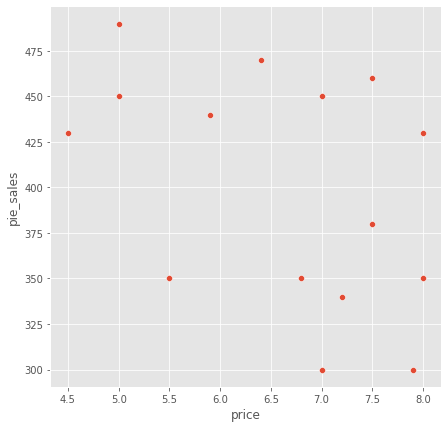

In [54]:
# Visualize the data using scatterplot
sns.scatterplot(x="price", y="pie_sales", data=df_piesales)



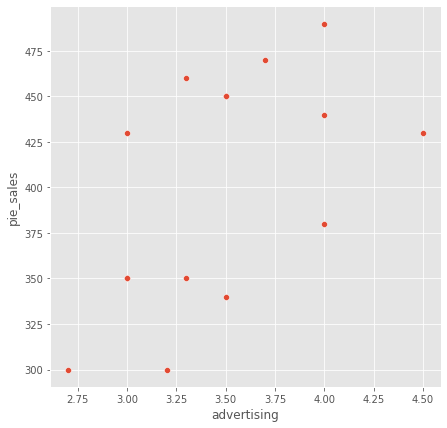

In [55]:
# Visualize the data using scatterplot
sns.scatterplot(x="advertising", y="pie_sales", data=df_piesales)


### **Regression using Sklearn**

Selanjutnya adalah meninisiasi variabel agar dataset penjualan pie dapat diproses. Proses inisiasi variabel independen (X) dan variabel dependent (Y), adalah sebagai berikut:

X = Price, Advertising
Y = Pie_sales

In [57]:
X = df_piesales[['price', 'advertising']]
Y = df_piesales['pie_sales']

x_surf, y_surf = np.meshgrid(np.linspace(df_piesales.price.min(), df_piesales.price.max(), 100),
                             np.linspace(df_piesales.advertising.min(), df_piesales.advertising.max(),100))
X_val = pd.DataFrame({'price': x_surf.ravel(), 'advertising': y_surf.ravel()})


Setelah selesai meninisiasi kedua variabel, langkah selanjutnya adalah melakukan pemodelan dataset penjualan pie menggunakan multiple linear regression.

In [58]:
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Langkah selanjutnya adalah mencari titik potong (b0) dan koefisien (b1, b2,… bn). Jumlah koefisien akan mengikuti jumlah variabel independen yang kita miliki, dalam kasus penjualan pie adalah 2

In [59]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 306.5261932837436
Coefficients: 
 [-24.97508952  74.13095749]


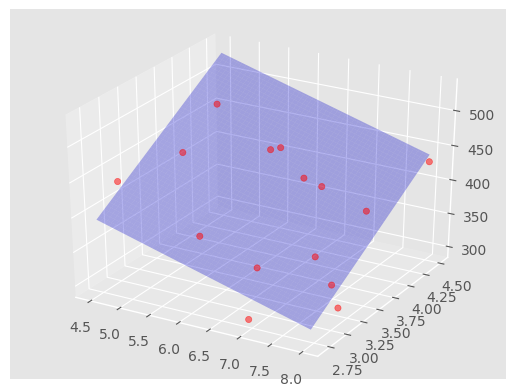

In [64]:
# Visualizing Linear Regression
plt.style.use('default')
plt.style.use('ggplot')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

fitY = regr.predict(X_val)
fitY=np.array(fitY)

ax.scatter(df_piesales['price'], df_piesales['advertising'], df_piesales['pie_sales'],c='red', marker='o', alpha=0.5)
ax.plot_surface(x_surf, y_surf, fitY.reshape(x_surf.shape), color='b', alpha=0.3)


Setelah mendapatkan nilai intercept sebesar 306.5261932837436 dan Coefficients:  [-24.97508952  74.13095749]


Langkah selanjutnya adalah melakukan prediksi.

In [65]:
# prediction with sklearn
new_price = 10.0
new_advertising = 6.0
print ('Predicted pie sales: \n', regr.predict([[new_price, new_advertising]]))

Predicted pie sales: 
 [501.56104304]


In [66]:
# prediction with sklearn
new_price = 3.8
new_advertising = 8.7
print ('Predicted pie sales: \n', regr.predict([[new_price, new_advertising]]))

Predicted pie sales: 
 [856.56018327]


Setelah melakukan prediksi dapat dianalisis bahwa ketika harga diturunkan dan iklan dinaikkan maka penjualan akan naik dan sebaliknya


### **Regression using Statsmodels**

In [67]:
X = sm.add_constant(X) # adding a constant

In [68]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              pie_sales   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.442
Method:                 Least Squares   F-statistic:                     6.539
Date:                Tue, 20 Oct 2020   Prob (F-statistic):             0.0120
Time:                        12:03:04   Log-Likelihood:                -77.510
No. Observations:                  15   AIC:                             161.0
Df Residuals:                      12   BIC:                             163.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         306.5262    114.254      2.683      